1. A map of movement (Folium)
2. Distance graph (increasing from zero)
3. Velocity graph (calculated from coordinates)
4. Acceleration graph (observed [three components] and calculated from speed [one component]).
5. Average speed as a number
6. Traveled distance as a number
7. The number of steps 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Define Haversine formula
#Inputs are the coordinates of consecutive points,lon1, lat1, lon2, lat2
# Returas the distance between them
# import libraries
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2 ):
    " Calculate the great circle distance in kilometers between two points on the earth (specified in decimal degrees)"
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 =map(radians, [lon1, lat1, lon2, lat2]) 

    # haversine formula
    dlon= lon2-lon1
    dlat= lat2-lat2
    a = sin(dlat/2)**2 + cos(lat2) * cos(lat2) * sin(dlon/2)**2
    c= 2 * asin(sqrt(a))
    r= 6371 # radius of earth in kilometers
    return c * r

In [41]:
#import the data
df = pd.read_csv('GPS_dataProject.csv')
df.head()
#df.info()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [42]:
#Derive velocity using haversine (although it is already in the data is most cases)

lat = df['longitude'] #Latitute
lon = df['latitude'] #Longitude

df['dist'] = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. we'll calculate the distance between consecutive points there
df['time_diff'] = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. we'll calculate the time between consecutive points there

for i in range(lat.shape[0]-1): #For-loop gose through the data untill the second last row
  df['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i+1 (in meters)
  df['time_diff'][i] = df['seconds_elapsed'][i+1] - df['seconds_elapsed'][i] #The time step between data points with indices i ja i+1 (in meters)

df['dist'][0] = 0
df['total_dist'] = df['dist'].cumsum()
df['velocity'] = df['dist'] / df['time_diff']
df['acceleration'] = (df['velocity'].diff()) / (df['seconds_elapsed'].diff())


#data.tail()
df.head()

C:\Users\shamm\AppData\Local\Temp\ipykernel_26084\930735896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i+1 (in meters)
C:\Users\shamm\AppData\Local\Temp\ipykernel_26084\930735896.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'][i] = df['seconds_elapsed'][i+1] - df['seconds_elapsed'][i] #The time step between data points with indices i ja i+1 (in meters)
C:\Users\shamm\AppData\Local\Temp\ipykernel_26084\930735896.py:10: SettingWithCopyWarning: 
A value is trying to be set o

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_dist,velocity,acceleration
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000,0.000000,NaN
1,1,5.339879,25.516227,65.071393,0.491712,0.340121,0.491712,1.445697,0.883563
2,2,5.680000,25.516240,65.071398,0.371292,0.631351,0.863004,0.588092,-2.521472
3,3,6.311351,25.516264,65.071394,0.160559,1.012578,1.023563,0.158564,-0.680331
4,4,7.323929,25.516267,65.071396,0.561956,1.005767,1.585519,0.558734,0.395198


 A map of movement (Folium)

In [43]:
import folium
##location_frame = df[['longitude','latitude']]
location_frame = df[['latitude','longitude']]
location_list = location_frame.values.tolist()

ave_lat = np.mean(location_list,axis=0)[0]
ave_lon = np.mean(location_list,axis =0)[1]

my_map = folium.Map(location=[ave_lat,ave_lon], zoom_start=20)

folium.PolyLine(location_list, color="red", weight=2.2, opacity=1).add_to(my_map)
my_map

Velocity graph (calculated from coordinates)

Text(0.5, 1.0, 'Velocity vs Time')

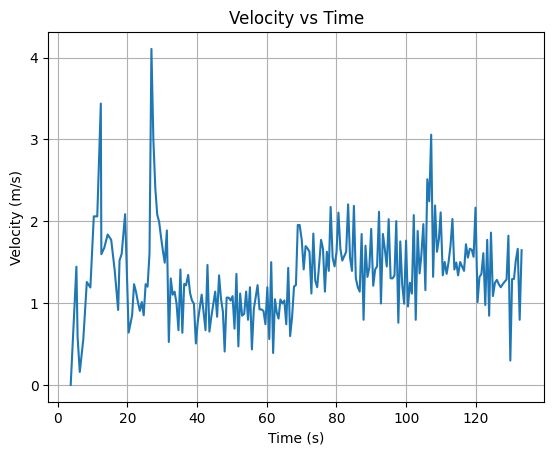

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.plot(df['seconds_elapsed'], df['velocity']) # derive from the raw data gps
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')

Distance graph (increasing from zero)

Text(0.5, 1.0, 'Distance vs Time')

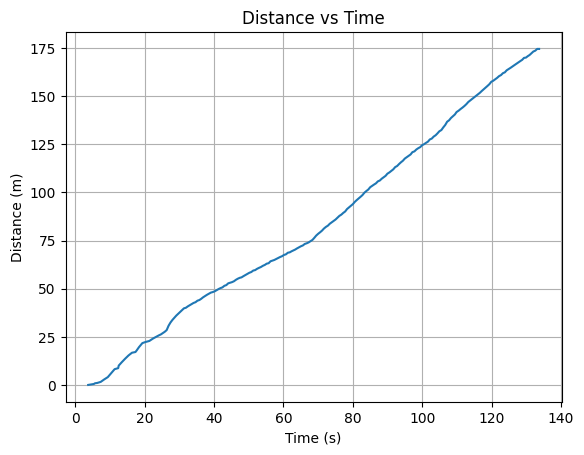

In [45]:
plt.plot(df['seconds_elapsed'], np.cumsum(df['dist'])) # derive from the raw data gps
plt.grid()  
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Distance vs Time')

In [46]:
#Derive Acceleration
velocity = df['velocity']
time = df['seconds_elapsed']
acceleration = np.diff(velocity)/np.diff(time)

Acceleration graph (observed [three components] and calculated from speed [one component]).

Text(0, 0.5, 'Acceleration [m/s^2]')

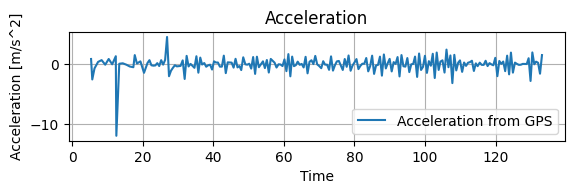

In [47]:
#Acceleration graph derive from gps data

plt.subplot(3, 1, 3)
plt.plot(df['seconds_elapsed'], df['acceleration'])
plt.legend(['Acceleration from GPS'])
plt.grid()
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration [m/s^2]')

Average speed as a number

In [48]:
#Average speed as a number
avg_speed = df['velocity'].mean()
print('Average speed: ', avg_speed, 'm/s')

Average speed:  1.359857760826498 m/s


Traveled distance as a number

In [49]:
#Traveled distance as a number
print("Total distance traveled is ", df['total_dist'].iloc[-1], "m")
df.head()

Total distance traveled is  174.57902668556005 m


,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_dist,velocity,acceleration
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000,0.000000,NaN
1,1,5.339879,25.516227,65.071393,0.491712,0.340121,0.491712,1.445697,0.883563
2,2,5.680000,25.516240,65.071398,0.371292,0.631351,0.863004,0.588092,-2.521472
3,3,6.311351,25.516264,65.071394,0.160559,1.012578,1.023563,0.158564,-0.680331
4,4,7.323929,25.516267,65.071396,0.561956,1.005767,1.585519,0.558734,0.395198


In [50]:
#Acceleration for 3 components derive from acceleration data
#Read data from Acceleration_Project.csv

df_acceleration = pd.read_csv('Acceleration_Project.csv')
df_acceleration.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


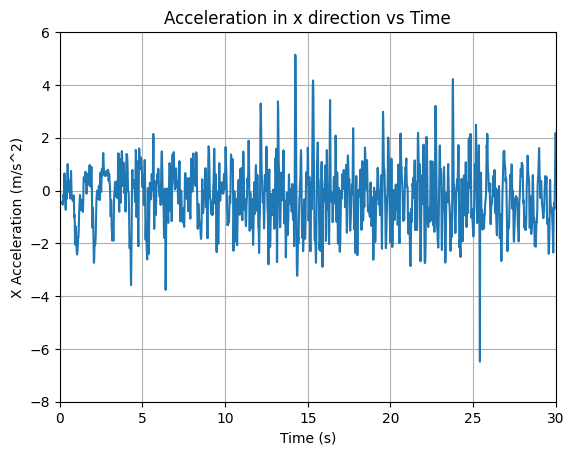

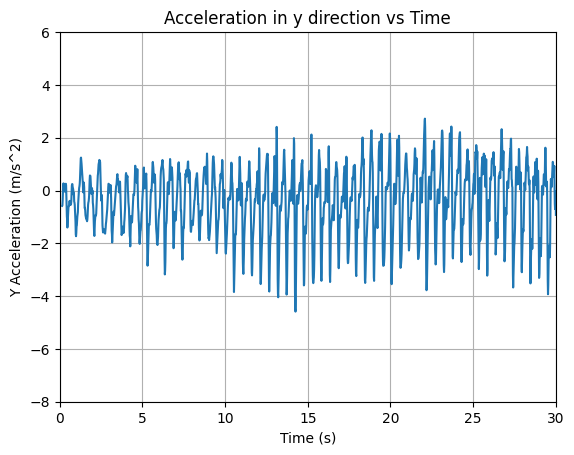

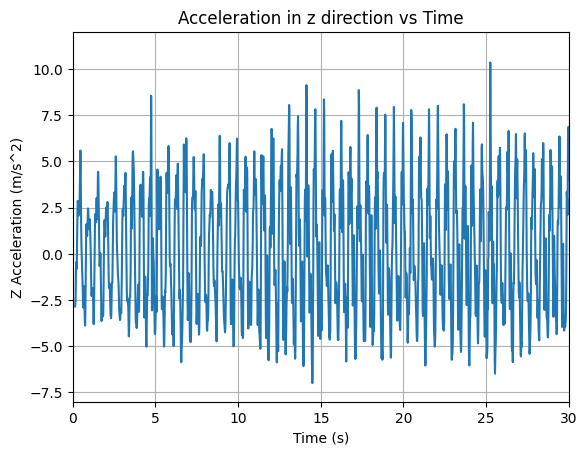

In [51]:
#plot the acceleration data

plt.plot(df_acceleration['seconds_elapsed'],df_acceleration['x'])
plt.grid()
plt.axis([0, 30, -8, 6]) 
plt.xlabel('Time (s)')
plt.ylabel('X Acceleration (m/s^2)')    
plt.title('Acceleration in x direction vs Time')
plt.show()

plt.plot(df_acceleration['seconds_elapsed'],df_acceleration['y'])
plt.grid()
plt.axis([0, 30, -8, 6])
plt.xlabel('Time (s)')
plt.ylabel('Y Acceleration (m/s^2)')
plt.title('Acceleration in y direction vs Time')
plt.show()

plt.plot(df_acceleration['seconds_elapsed'],df_acceleration['z'])    
plt.grid()
plt.axis([0, 30, -8, 12])
plt.xlabel('Time (s)')
plt.ylabel('Z Acceleration (m/s^2)')
plt.title('Acceleration in z direction vs Time')
plt.show()

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's generate a theoritical signal
t1 = 0 #start time
t2 = 100 #end time
dt = 0.1 
time_vect = np.arange(t1,t2,dt) #Define a time vactor
#time_vect

#Model signal
signal = np.sin(time_vect/2)

#Add noise to the signal
noise_level = 1 #Noise
bckround_max = 3 #Background level

#create a noisy signal with background
noisy_signal = signal + (-(time_vect**2) + t2*time_vect)/(t2**2/4)*bckround_max + noise_level*np.random.rand(len(time_vect)) 

data = pd.read_csv('Acceleration_Project.csv')
data.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


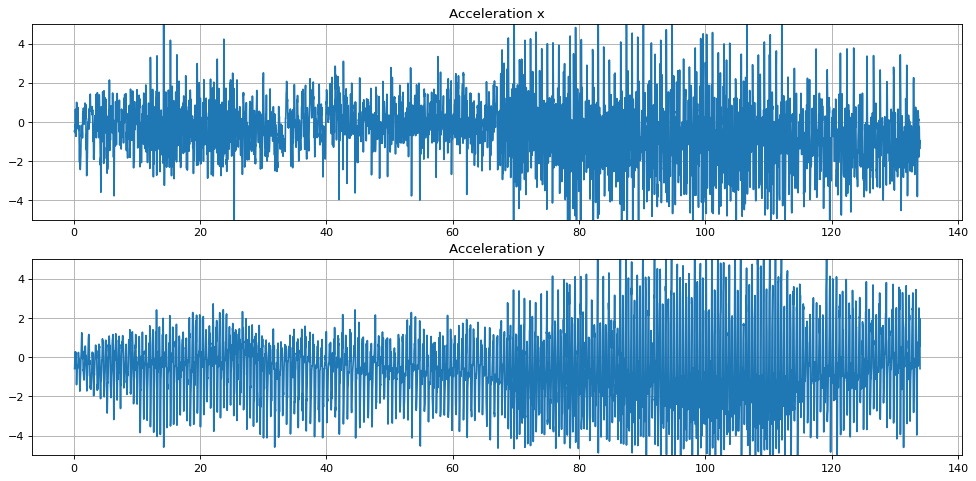

In [53]:
fig = plt.figure(num=None, figsize= (15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(data['seconds_elapsed'],data['x'])
plt.grid()
plt.ylim(-5,5)
plt.title('Acceleration x')
plt.subplot(2,1,2)
plt.plot(data['seconds_elapsed'],data['y'])
plt.title('Acceleration y')
plt.grid()
plt.ylim(-5,5)
plt.show()

In [54]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
    
def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

The number of steps

Number of steps 255.5


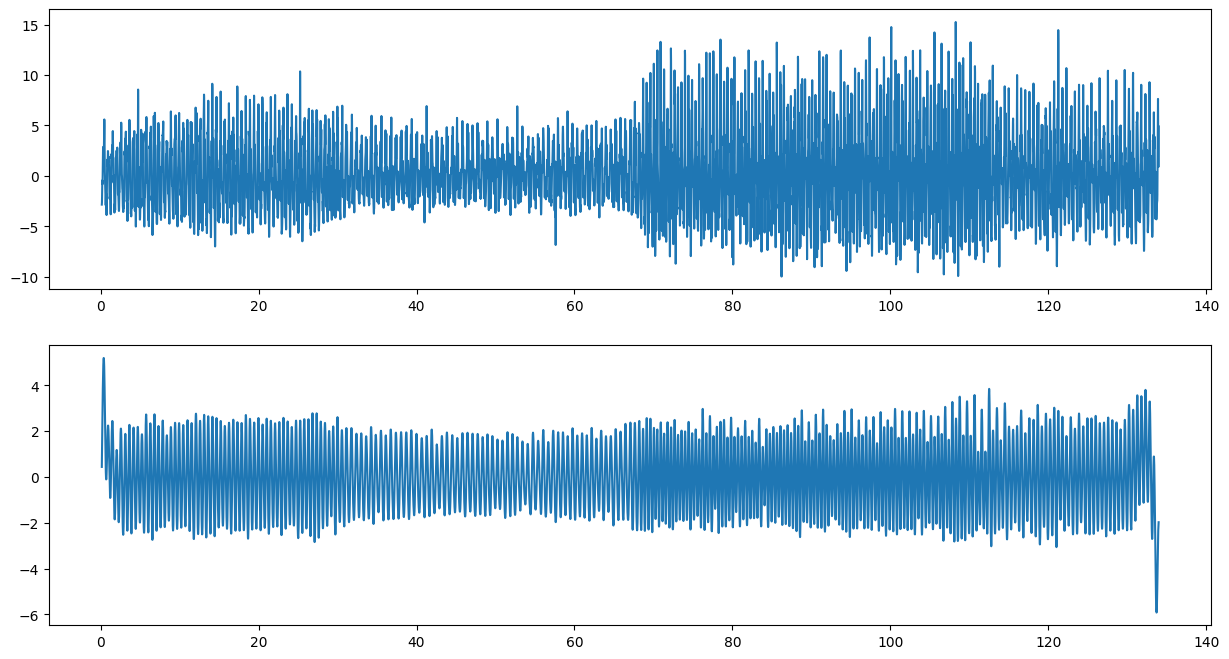

In [55]:
#Filter the data
noisy_signal = data['z']
time = data['seconds_elapsed']
order = 2
dt = (time[len(time)-1]- time[0])/len(time) #Time difference between consecutive observations, and called sampling interval

fs = 1/dt #Sampling rate
nyq = 0.5 * fs 
cutoff_H = 1/5 #Highpass cut-off
cutoff_L = 1/0.5 #Lowpass cut-off
#After this filtering we'll have only frequencies from 1/40 to 1/5 in the data 

lowpass_filered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #Filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filered, cutoff_H, fs, nyq, order) #Filter out low frequencies

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(time,noisy_signal)
plt.subplot(2,1,2)
plt.plot(time,final_signal)

stepdata = final_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps = steps + 0.5
print('Number of steps',steps)

1. Does the acceleration calculated from the speed match the observed acceleration? What differences do you notice? What could be their cause?

Ans:The acceleration calculate from the speed(gps) mostly matches the observation acceleration. Average speed is 1.36 m/s and total distance is 174.58 m. there has some graphical difference also. The cause is the highly noisy acceleration data and the non-fixed coordinate system.

2. Is the number of steps logical?

Ans: The number of steps are 255.5. It is logical. 